## <font color="#59B4C3">🔨&nbsp;&nbsp;Google Colab Setup</font>
Upload the data (without unzipping it) to your Google Drive to be able to access datasets.



## <font color="#59B4C3">🎯&nbsp;&nbsp;Your task</font>

Take some time to play with this notebook (you will need to run the code this time) to gain a deeper understanding of the latent space. While there are no specific questions associated with this notebook, its content is important and it shouldn't take you too much time.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/dcgan.zip

Archive:  /content/drive/MyDrive/dcgan.zip
   creating: dcgan/
   creating: dcgan/discriminator_3/
 extracting: dcgan/discriminator_3/fingerprint.pb  
  inflating: dcgan/discriminator_3/keras_metadata.pb  
   creating: dcgan/discriminator_3/variables/
  inflating: dcgan/discriminator_3/variables/variables.data-00000-of-00001  
  inflating: dcgan/discriminator_3/variables/variables.index  
  inflating: dcgan/discriminator_3/saved_model.pb  
   creating: dcgan/discriminator_3/assets/
   creating: dcgan/discriminator_4/
 extracting: dcgan/discriminator_4/fingerprint.pb  
  inflating: dcgan/discriminator_4/keras_metadata.pb  
   creating: dcgan/discriminator_4/variables/
  inflating: dcgan/discriminator_4/variables/variables.data-00000-of-00001  
  inflating: dcgan/discriminator_4/variables/variables.index  
  inflating: dcgan/discriminator_4/saved_model.pb  
   creating: dcgan/discriminator_4/assets/
   creating: dcgan/discriminator_5/
 extracting: dcgan/discriminator_5/fingerprint.pb  
 

## <font color="#59B4C3">🧺&nbsp;&nbsp;Load Generator Model</font>

In [4]:
from tensorflow import keras

generator = keras.models.load_model(f'dcgan/generator_1', compile=False)

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


## <font color="#59B4C3">🎩&nbsp;&nbsp;Generate Some Images</font>

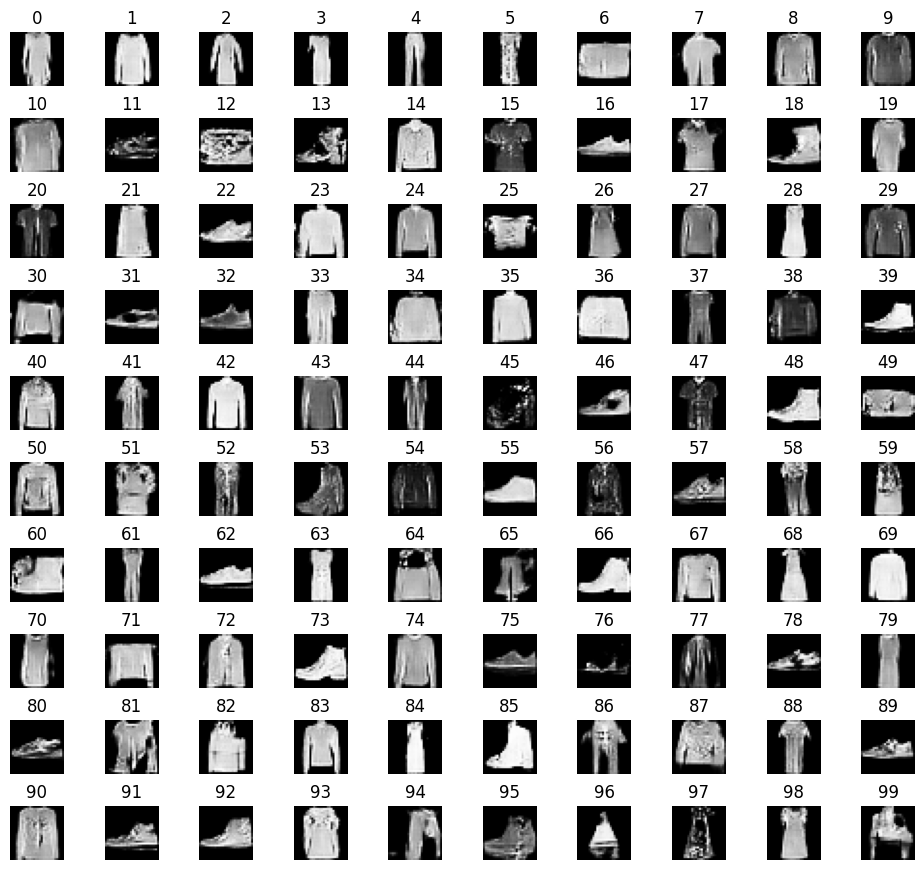

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

n_images = 100

# Remove seed if you want different images each time you run this cell
random_latent_vectors = tf.random.normal(shape=(n_images, 128), seed=1000)
generated_images = generator(random_latent_vectors)
generated_images = np.uint8(generated_images.numpy() * 127.5 + 127.5)

plt.figure(figsize=(12,12))

for i in range(n_images):
    plt.subplot(10, 10, i+1)
    plt.subplots_adjust(top=0.8, hspace=0.6)
    plt.title(str(i))
    plt.axis("off")
    plt.imshow(generated_images[i].squeeze(), cmap="gray")

plt.show()

## <font color="#59B4C3">🎨&nbsp;&nbsp;What Is Latent Space?</font>

The latent space is a multi-dimensional space the encode data into more abstract features.

Imagine you where to compare clothes images yourself, you would think about them with some abstractions (does it have sleeves? For which body part is it? ...) on some scales (sleeves lenght, ...) instead of comparing images pixels values one by one.

That's what we're doing with machine learning. We learn a meaningful way to encode the data instead of working directly on the whole data and then we can either do classification, regression, or reconstruct back data.

Most of the time the features it will learn will not be directly interpretable but some models architectures are designed in a way to have features we can understand (e.g. InfoGAN).

![Latent Space](https://miro.medium.com/max/720/0*kHJ_LsPi-jz_CreZ.webp)

In our case with DCGAN, we don't have the encoding part.

## <font color="#59B4C3">🔬&nbsp;&nbsp;Exploring GAN Latent Space</font>

Remember that with DCGAN, input vectors values are latent variables: features describing the object that are "hidden" because we are not directly able to measure or observe them.

We have as many dimensions in the latent space as we have values in the input vector. Thus a latent vector with two values form a space with two dimensions and one with 128 values form a space with 128 dimensions.

Each images we generate are sampled from this latent space, all of them have a feature vector representation that lies in this feature space.

When we understand that, we can as well understand that we can go from one generated image to another by moving from the first latent vector to the other one (we are moving from one point in the latent space to another one).

In [6]:
def image_generated_from_latent_vector(latent_vector):
  generated_image = generator(np.expand_dims(latent_vector, axis=0))[0]

  print("Latent vector: ", latent_vector)

  plt.title("Image generated")
  plt.imshow(np.uint8(generated_image.numpy() * 127.5 + 127.5).squeeze(), cmap="gray")
  plt.show()

### Feature vector example

You can see below an example of a feature vector and the image we've generated from it.

Latent vector:  tf.Tensor(
[-0.58210105 -0.0390299  -0.22065678  1.8436068   1.1530138   0.20031336
  0.1682411  -0.08062838  1.0032022   0.8074239   0.94278926 -0.20063421
 -0.19039308 -0.39203006  0.10490835 -0.86175054  0.4423562   0.00934259
  1.1092153  -1.6764241   1.205116   -1.1912682   0.36973667  0.06543792
 -2.4396558   0.93140846 -0.816644    1.1512136   0.461739   -0.07664832
 -0.34913003 -1.1193247   0.44655365 -0.12676387  1.1789005  -0.51923877
  0.68909895 -0.72937924 -1.1738281  -0.60186607 -0.9325627   1.4384674
  0.3560915  -0.27232647  0.264318    1.320569   -0.11569775  0.07907485
 -1.2139782  -0.28921002 -0.508794    0.6399194  -0.45367056 -0.07427063
 -0.68373656  0.8510423   0.3881987  -0.0740802  -0.8096536  -0.7106872
 -0.25961724  2.4217672   1.3359754  -0.18214431 -1.0346998   0.46449232
 -0.09387536 -1.075957   -1.8126979   0.41819963 -2.4967592   0.19279937
  0.0373782  -0.7316086   0.89503    -0.550248    1.8855098  -2.6466897
  1.4002614   0.31595224  0

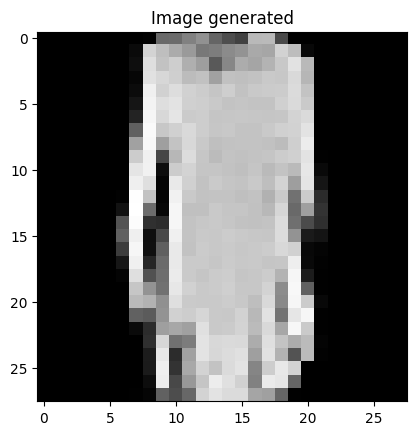

In [7]:
image_generated_from_latent_vector(random_latent_vectors[0])

### <font color="#59B4C3">🌍&nbsp;&nbsp;Moving in the latent space from images to images</font>

In [8]:
def plot_linear_interpolation(vector_index1, vector_index2, vector_index3, n_step=10):
  move_vector_x = (random_latent_vectors[vector_index2] - random_latent_vectors[vector_index1]) / n_step
  move_vector_y = (random_latent_vectors[vector_index3] - random_latent_vectors[vector_index1]) / n_step

  fig, axs = plt.subplots(n_step, n_step, figsize=(n_step, n_step))

  axs[0, 0].set_title(vector_index1)
  axs[0, n_step - 1].set_title(vector_index2)
  axs[n_step - 1, 0].set_title(vector_index3, x=-0.25, y=0.3)

  for i in np.arange(n_step):
    for j in np.arange(n_step):
      generated_image = generator(np.expand_dims(random_latent_vectors[vector_index1] + move_vector_y * i + move_vector_x * j, axis=0))[0]
      axs[i,j].axis('off')
      axs[i,j].imshow(np.uint8(generated_image.numpy() * 127.5 + 127.5).squeeze(), cmap="gray")

  plt.show()

Choose the latent vector indexes and see how we can travel from one image to another. The indexes are the same as the number shown in the part where we show some images generated with the generator model.

The grid it will create below is like so: on the x axis we go from the first selected image (top left) to the second selected image (top right) by taking the difference between the two vectors and dividing this difference into _n_ number of steps. We're doing the same with the y axis, going from the first selected image (top left) to the third one (bottom left).

On the diagonal, we're moving in both the direction of the second image and the direction of the third one.

Click "Run Interact" to see the result.

In [9]:
from ipywidgets import interact_manual
import ipywidgets as widgets

style = {'description_width': 'initial'}

interact_manual(
    plot_linear_interpolation,
    vector_index1=widgets.BoundedIntText(min=0, max=99, step=1, value=0, style=style),
    vector_index2=widgets.BoundedIntText(min=0, max=99, step=1, value=1, style=style),
    vector_index3=widgets.BoundedIntText(min=0, max=99, step=1, value=2, style=style),
    n_step=widgets.IntSlider(min=2, max=20, step=1, value=10)
)

interactive(children=(BoundedIntText(value=0, description='vector_index1', max=99, style=DescriptionStyle(desc…

<function __main__.plot_linear_interpolation(vector_index1, vector_index2, vector_index3, n_step=10)>

See below an example of moving in the latent space of a stable diffusion model (similar to DALL-E):

>Latent space walking, or latent space exploration, is the process of sampling a point in latent space and incrementally changing the latent representation. Its most common application is generating animations where each sampled point is fed to the decoder and is stored as a frame in the final animation. For high-quality latent representations, this produces coherent-looking animations. These animations can provide insight into the feature map of the latent space, and can ultimately lead to improvements in the training process. One such GIF is displayed below:\
![Latent Space Walk](https://keras.io/img/examples/generative/random_walks_with_stable_diffusion/panda2plane.gif)\
>Source: https://keras.io/examples/generative/random_walks_with_stable_diffusion/

## <font color="#59B4C3">🔧&nbsp;&nbsp;Selecting Features Values Manually</font>

Here, you can see how it's not easy to understand the role of each features. Try to change the latent features values and to see the impact.

In [10]:
from ipywidgets import Layout, HBox, VBox, interactive

def select_feature_vector(**kwargs):
  image_generated_from_latent_vector(list(kwargs.values()))

features_widget_list = {
    f"feature_{idx}": widgets.FloatSlider(min=-4, max=4, step=0.05, value=0)
    for idx in np.arange(128)
}

box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch',
                    width='70%')

widget = interactive(
    select_feature_vector,
    {'manual': True},
    **features_widget_list,
)

controls = HBox(widget.children[:-1], layout = Layout(flex_flow='row wrap'))
output = widget.children[-1]
output.layout.height = '350px'

display(VBox([controls, output]))